In [1]:
import os
import sys
from collections import OrderedDict

import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
from scipy import stats
from scipy.io import mmread, mmwrite
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize, scale


def nd(arr):
    return np.asarray(arr).reshape(-1)


def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, "k-", alpha=0.75, zorder=0)
    ax.set_aspect("equal")
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax


fsize = 15

base_figure_path = "figures"

alpha = 0.33

import matplotlib

matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["font.size"] = fsize
%config InlineBackend.figure_format = 'retina'

In [2]:
raw = pd.read_csv(
    "synchromesh/data/size_raw.txt",
    header=None,
    sep="\t",
    names=["ds", "ncells", "nbytes"],
)
sct = pd.read_csv(
    "synchromesh/data/size_sctransform.txt",
    header=None,
    sep="\t",
    names=["ds", "ncells", "nbytes"],
)

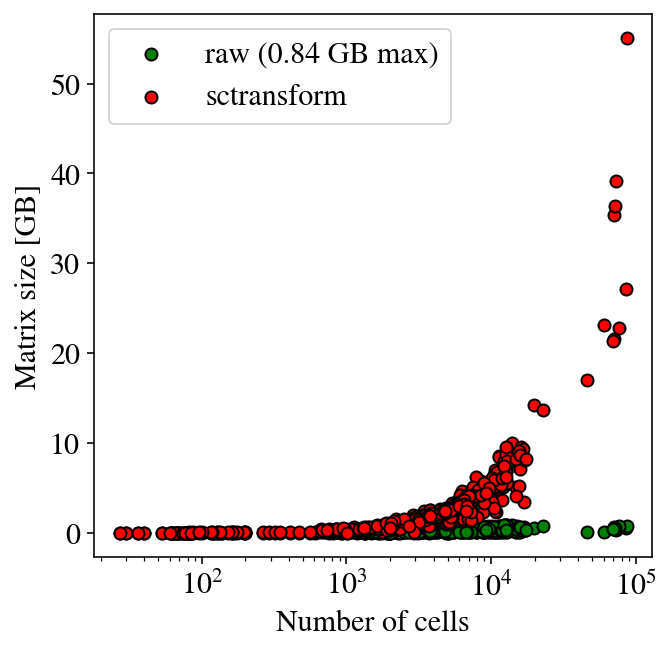

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))

x = raw["ncells"]
y = raw["nbytes"] / 1e9
mx = y.max()
ax.scatter(x, y, label=f"raw ({mx:,.2f} GB max)", edgecolor="k", facecolor="green")

y = sct["nbytes"] / 1e9
ax.scatter(x, y, label="sctransform", edgecolor="k", facecolor="red")

ax.set(
    **{
        "xlabel": "Number of cells",
        "ylabel": "Matrix size [GB]",
        "xscale": "log",
    }
)

ax.legend()


base_file_name = "memory"
save_path = os.path.join(base_figure_path, base_file_name)
if not os.path.exists(save_path):
    os.makedirs(save_path)

fig.savefig(
    os.path.join(save_path, f"{base_file_name}.png"),
    facecolor="white",
    transparent=False,
    dpi=300,
    bbox_inches="tight",
)
fig.savefig(
    os.path.join(save_path, f"{base_file_name}.pdf"), dpi=300, bbox_inches="tight"
)

fig.show()

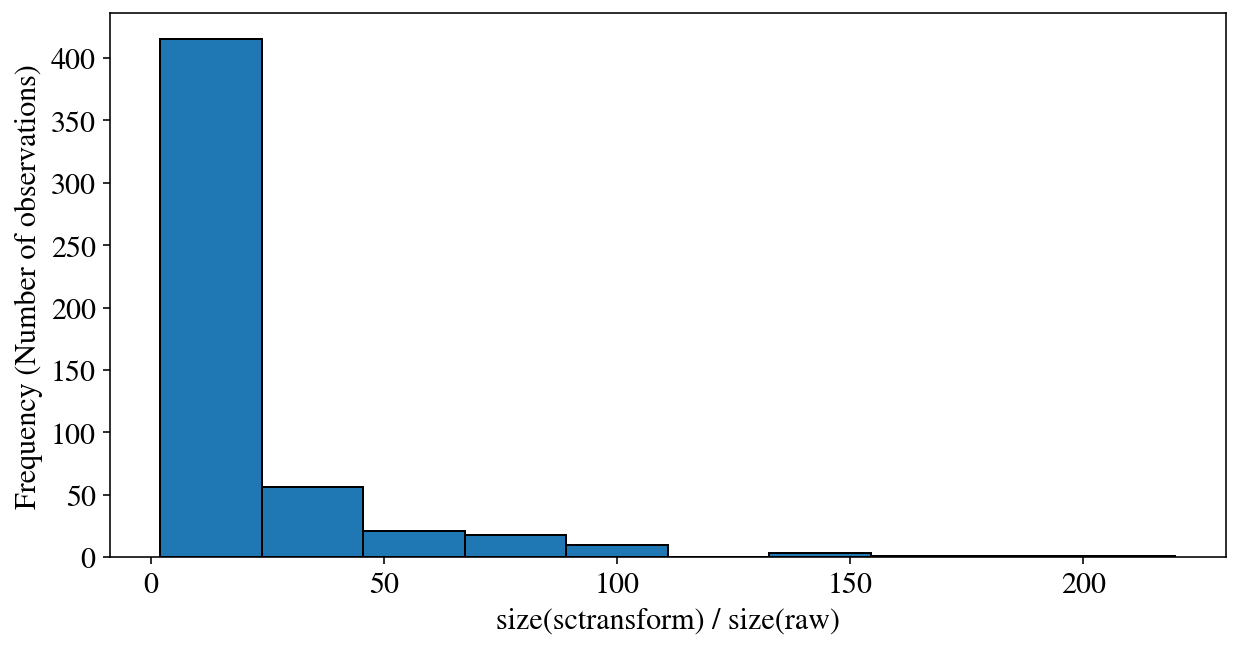

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))

fc = sct["nbytes"] / raw["nbytes"]
x = fc.values

ax.hist(x, edgecolor="k")

ax.set(
    **{
        "xlabel": "size(sctransform) / size(raw)",
        "ylabel": "Frequency (Number of observations)",
    }
)
fig.show()

In [31]:
fc.mean()

20.422308006938618

In [21]:
fc.sort_values()

GSM3773121      2.127047
GSM4272896      2.322254
GSM3739219      2.567159
GSM2786157      2.743994
GSM4769388      2.843236
                 ...    
GSM3576400    135.465529
ERS4228662    141.722127
ERX2756729    157.454049
GSM3711764    196.539774
ERX2756720    219.671722
Name: nbytes, Length: 526, dtype: float64